**Часть 1.Предобработка**

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/kaggle/input/credit-risk-dataset/credit_risk_dataset.csv')
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [3]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [6]:
df.describe(include='all')

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581,31686.000000,32581,32581,32581.000000,29465.000000,32581.000000,32581.000000,32581,32581.000000
unique,NaN,NaN,4,NaN,6,7,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,RENT,NaN,EDUCATION,A,NaN,NaN,NaN,NaN,N,NaN
freq,NaN,NaN,16446,NaN,6453,10777,NaN,NaN,NaN,NaN,26836,NaN
mean,27.734600,6.607485e+04,NaN,4.789686,NaN,NaN,9589.371106,11.011695,0.218164,0.170203,NaN,5.804211
std,6.348078,6.198312e+04,NaN,4.142630,NaN,NaN,6322.086646,3.240459,0.413006,0.106782,NaN,4.055001
min,20.000000,4.000000e+03,NaN,0.000000,NaN,NaN,500.000000,5.420000,0.000000,0.000000,NaN,2.000000
25%,23.000000,3.850000e+04,NaN,2.000000,NaN,NaN,5000.000000,7.900000,0.000000,0.090000,NaN,3.000000
50%,26.000000,5.500000e+04,NaN,4.000000,NaN,NaN,8000.000000,10.990000,0.000000,0.150000,NaN,4.000000
75%,30.000000,7.920000e+04,NaN,7.000000,NaN,NaN,12200.000000,13.470000,0.000000,0.230000,NaN,8.000000


In [7]:
df['person_emp_length'] = df['person_emp_length'].fillna(value=np.nanmedian(df['person_emp_length']))  
df['loan_int_rate'] = df['loan_int_rate'].fillna(value=np.nanmean(df['loan_int_rate']))
df = df.dropna(subset=['loan_amnt'])
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.767994,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.087372,6322.086646,3.081605,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,11.011695,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.110000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


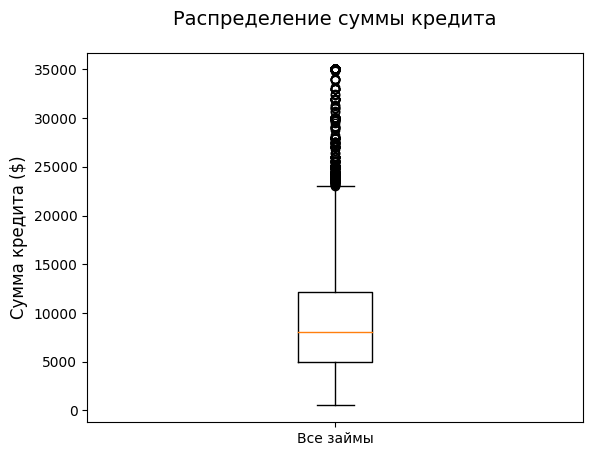

Описательная статистика:
count    32581.000000
mean      9589.371106
std       6322.086646
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12200.000000
max      35000.000000
Name: loan_amnt, dtype: float64


In [8]:
import matplotlib.pyplot as plt
plt.boxplot(df['loan_amnt'])

plt.title('Распределение суммы кредита', pad=20, fontsize=14)
plt.ylabel('Сумма кредита ($)', fontsize=12)
plt.xticks([1], ['Все займы']) 

plt.show()

print("Описательная статистика:")
print(df['loan_amnt'].describe())

In [9]:
df = df.drop(df[df['person_emp_length'] > 1000].index)
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.767994,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.087372,6322.086646,3.081605,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,11.011695,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.110000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [10]:
pd.unique(df['person_home_ownership'])

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [11]:
df['person_home_ownership'] = df['person_home_ownership'].fillna(value=df['person_home_ownership'].mode()[0]) 
pd.unique(df['person_home_ownership'])

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [12]:
edu_dict = {'RENT':0, 'OWN':1, "MORTGAGE":2, "OTHER":3,}
df['person_home_ownership'] = [edu_dict[x] for x in df['person_home_ownership']]
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,0,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,1,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,2,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,0,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,0,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  int64  
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.0+ MB


In [14]:
df = df.drop(columns=['person_age'])
df.head()

,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,59000,0,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,9600,1,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,9600,2,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,65500,0,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,54400,0,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [15]:
pd.unique(df['loan_intent'])

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [16]:
df = pd.get_dummies(df, prefix='loint', dtype=float)
df.head()

,person_income,person_home_ownership,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,loint_DEBTCONSOLIDATION,loint_EDUCATION,...,loint_VENTURE,loint_A,loint_B,loint_C,loint_D,loint_E,loint_F,loint_G,loint_N,loint_Y
0,59000,0,123.0,35000,16.02,1,0.59,3,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,9600,1,5.0,1000,11.14,0,0.10,2,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,9600,2,1.0,5500,12.87,1,0.57,3,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,65500,0,4.0,35000,15.23,1,0.53,2,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,54400,0,8.0,35000,14.27,1,0.55,4,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


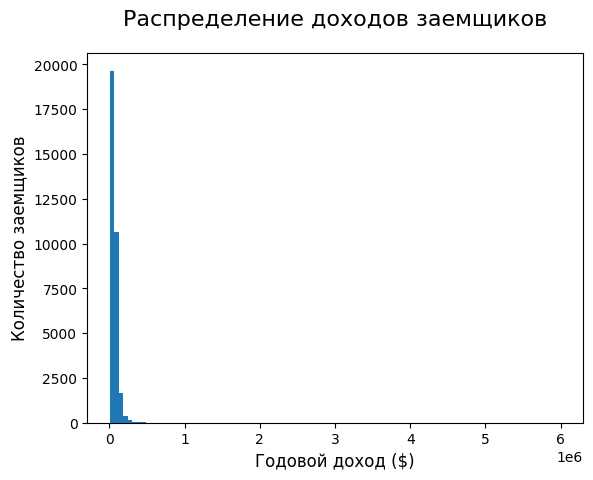

In [17]:
import matplotlib.pyplot as plt
plt.hist(df['person_income'], bins=100)

plt.title('Распределение доходов заемщиков', pad=20, fontsize=16)
plt.xlabel('Годовой доход ($)', fontsize=12)
plt.ylabel('Количество заемщиков', fontsize=12)

plt.show()

In [18]:
cols_to_norm = ['person_emp_length', 'cb_person_cred_hist_length']
cols_to_std = ['person_income']

for col in cols_to_norm:
    df[col] = (df[col] - np.min(df[col])) / (np.max(df[col]) - np.min(df[col]))
for col in cols_to_std:
    df[col] = (df[col] - np.mean(df[col])) / np.std(df[col])

df.describe()

,person_income,person_home_ownership,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,loint_DEBTCONSOLIDATION,loint_EDUCATION,...,loint_VENTURE,loint_A,loint_B,loint_C,loint_D,loint_E,loint_F,loint_G,loint_N,loint_Y
count,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,...,32581.000000,32581.000000,32581.00000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,1.116595e-16,0.914429,0.038764,9589.371106,11.011695,0.218164,0.170203,0.135865,0.159971,0.198060,...,0.175532,0.330776,0.32077,0.198214,0.111292,0.029588,0.007397,0.001964,0.823670,0.176330
std,1.000015e+00,0.960858,0.033231,6322.086646,3.081605,0.413006,0.106782,0.144821,0.366584,0.398544,...,0.380427,0.470500,0.46678,0.398660,0.314498,0.169450,0.085688,0.044278,0.381106,0.381106
min,-1.001495e+00,0.000000,0.000000,500.000000,5.420000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-4.448836e-01,0.000000,0.016260,5000.000000,8.490000,0.000000,0.090000,0.035714,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,-1.786780e-01,0.000000,0.032520,8000.000000,11.011695,0.000000,0.150000,0.071429,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2.117569e-01,2.000000,0.056911,12200.000000,13.110000,0.000000,0.230000,0.214286,0.000000,0.000000,...,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.573601e+01,3.000000,1.000000,35000.000000,23.220000,1.000000,0.830000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **Часть 2.Визуализация**

<Axes: >

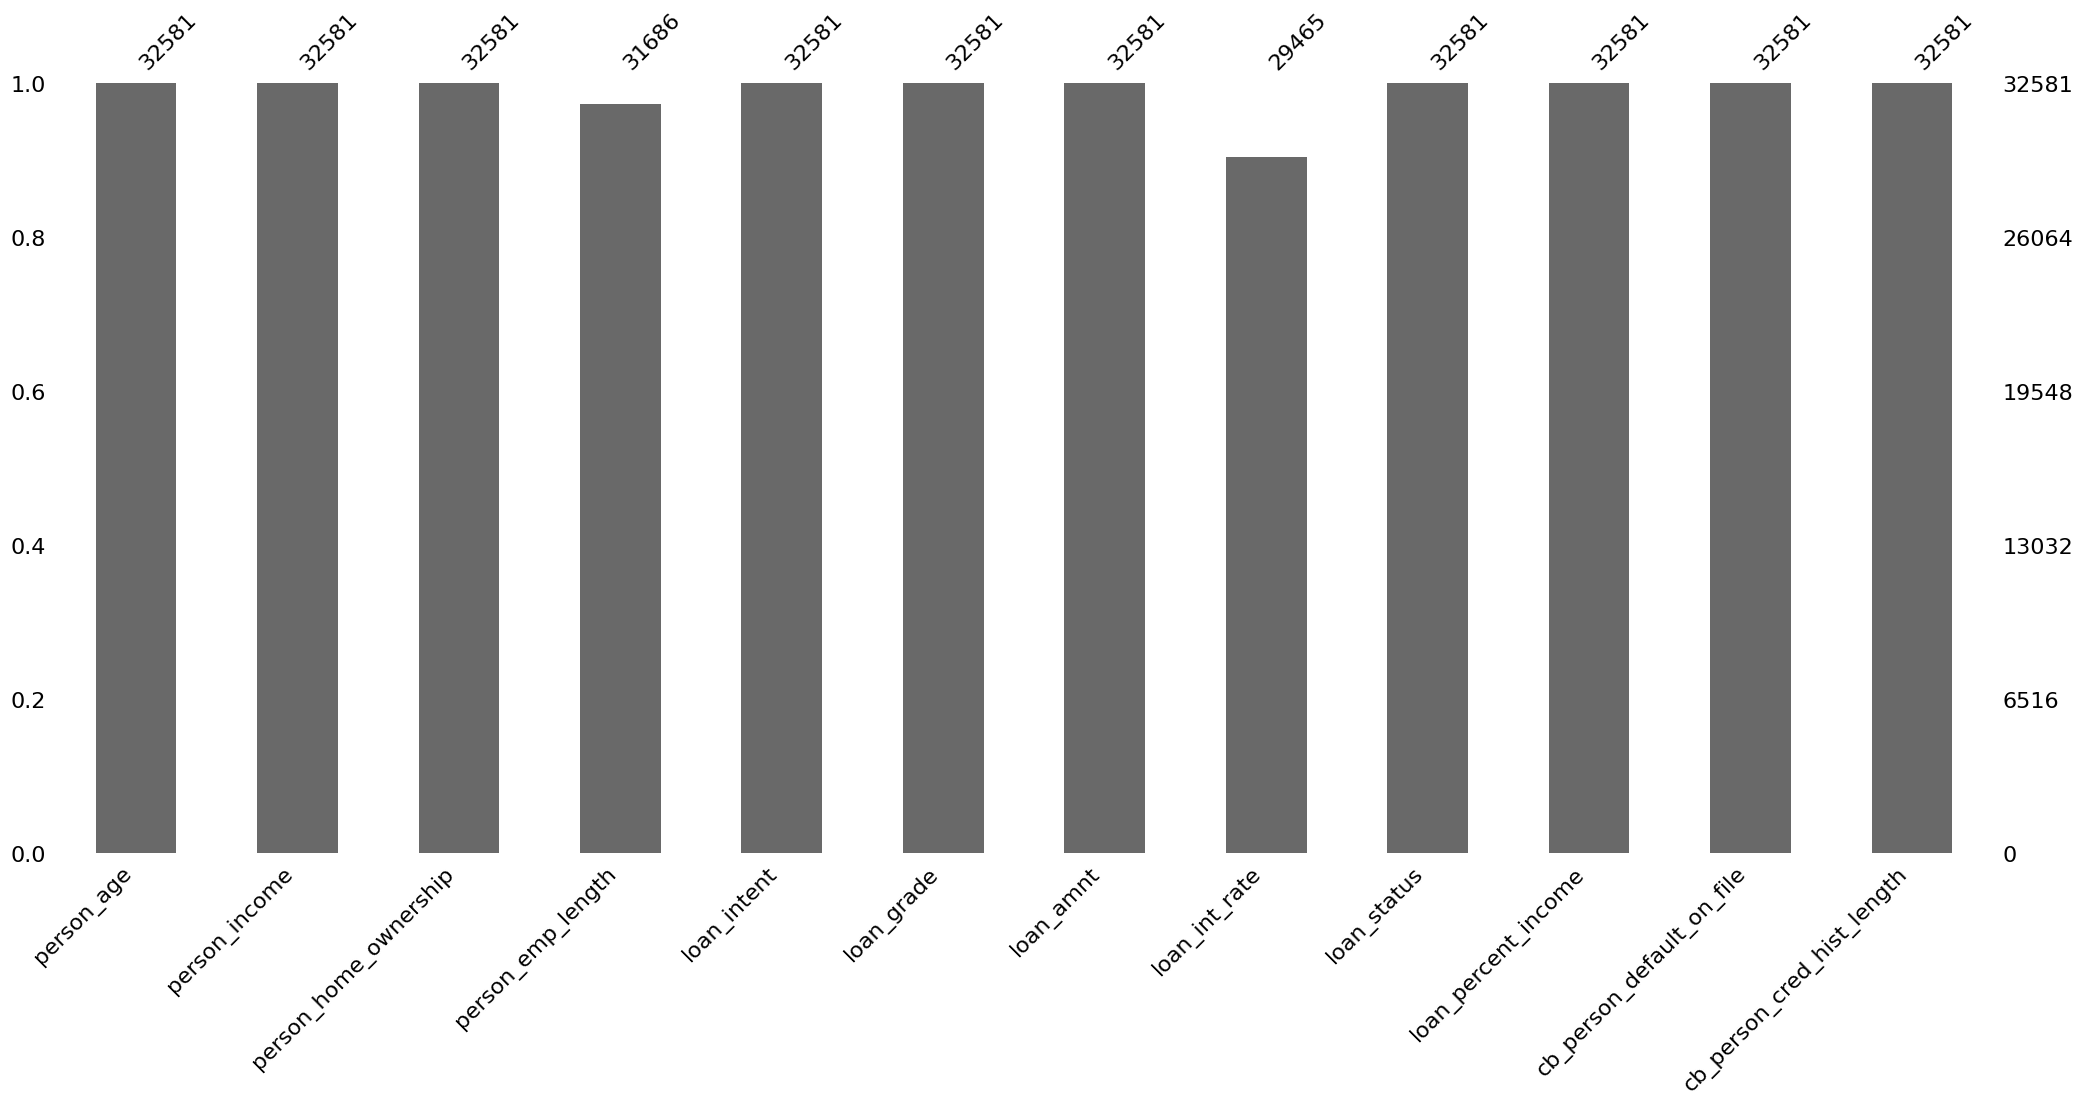

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
df2 = pd.read_csv('/kaggle/input/credit-risk-dataset/credit_risk_dataset.csv')
msno.bar(df2)

Комментарий: График пропущенных данных. На графике видно, что в данных отсутствуют значительные пропуски, что указывает на хорошее качество данных. 

<Axes: >

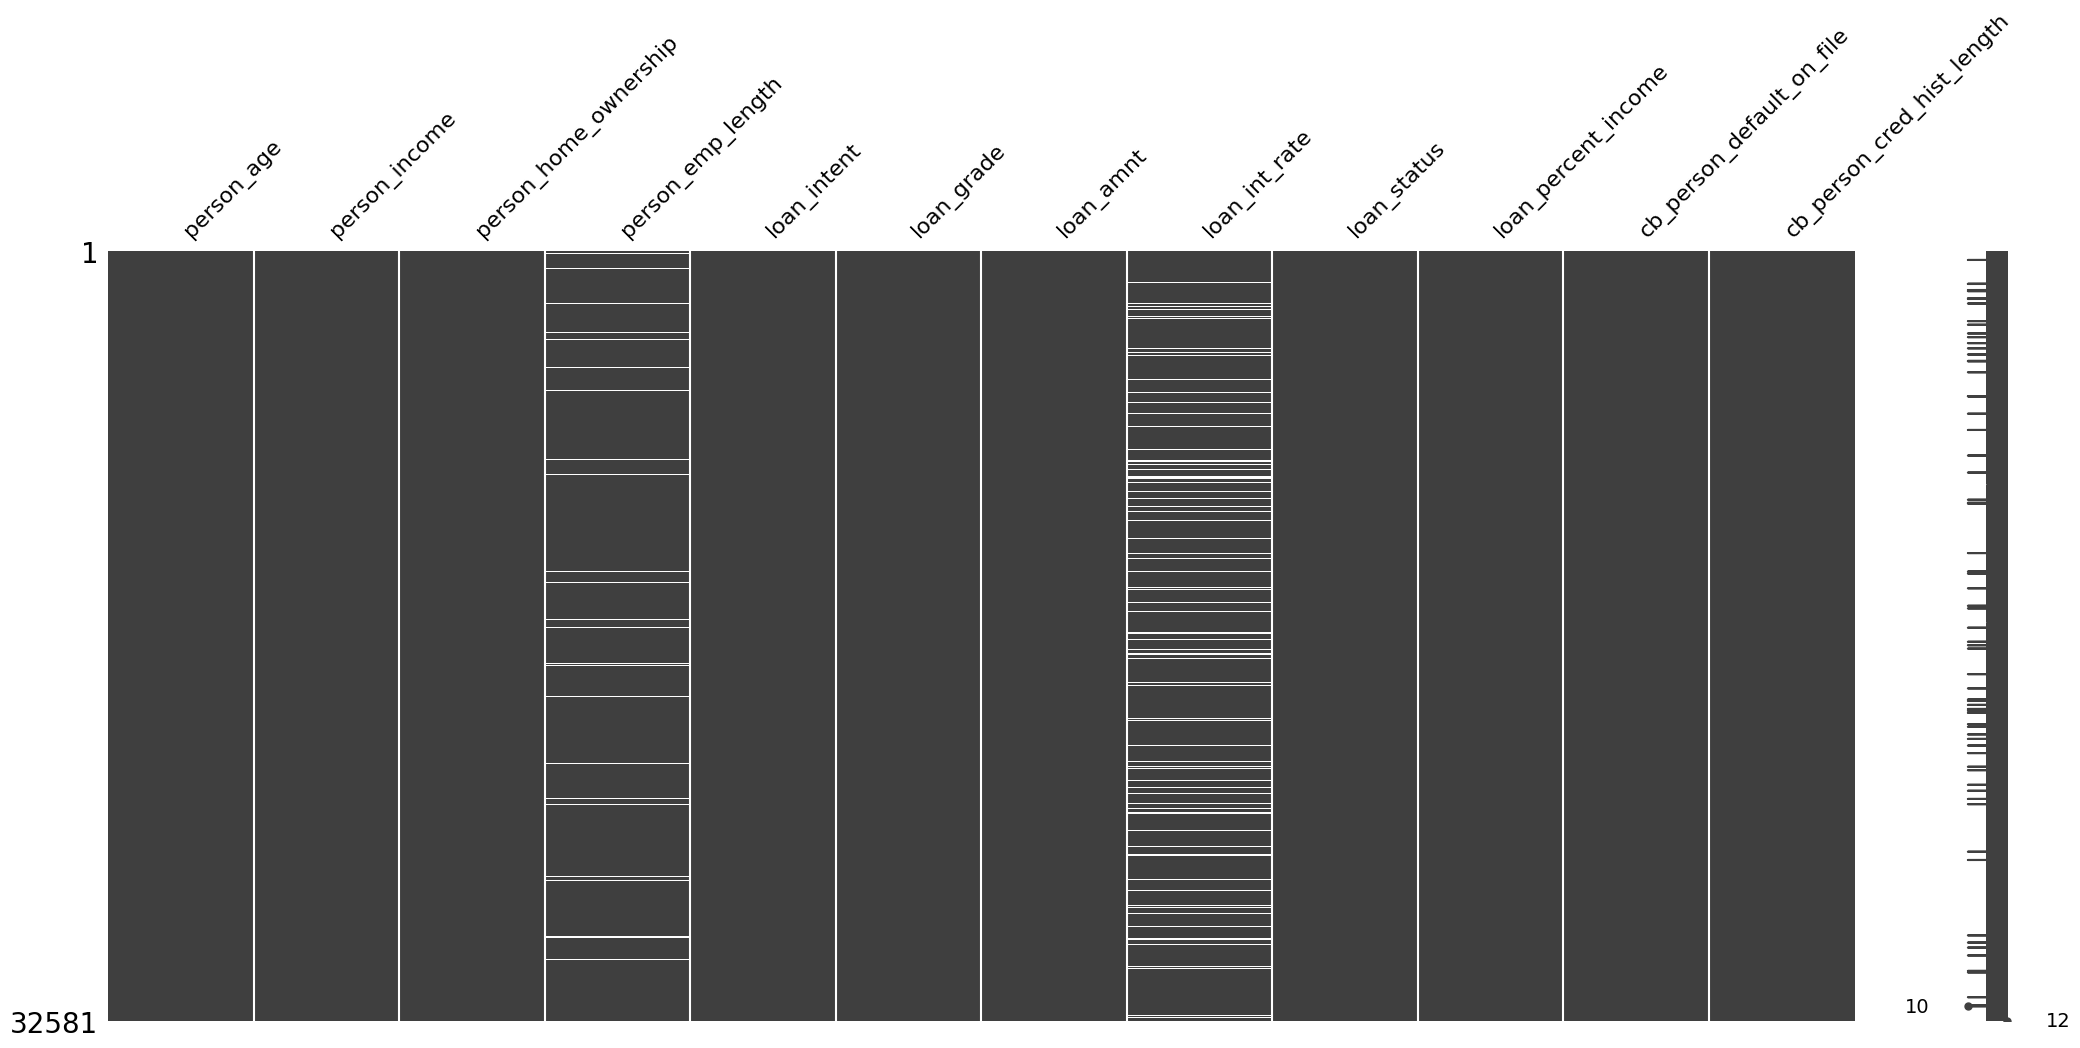

In [20]:
msno.matrix(df2)

Комментарий: матрица подтверждает отсутствие пропусков в данных. Белые линии или точки могли бы указывать на пропущенные значения

<Axes: >

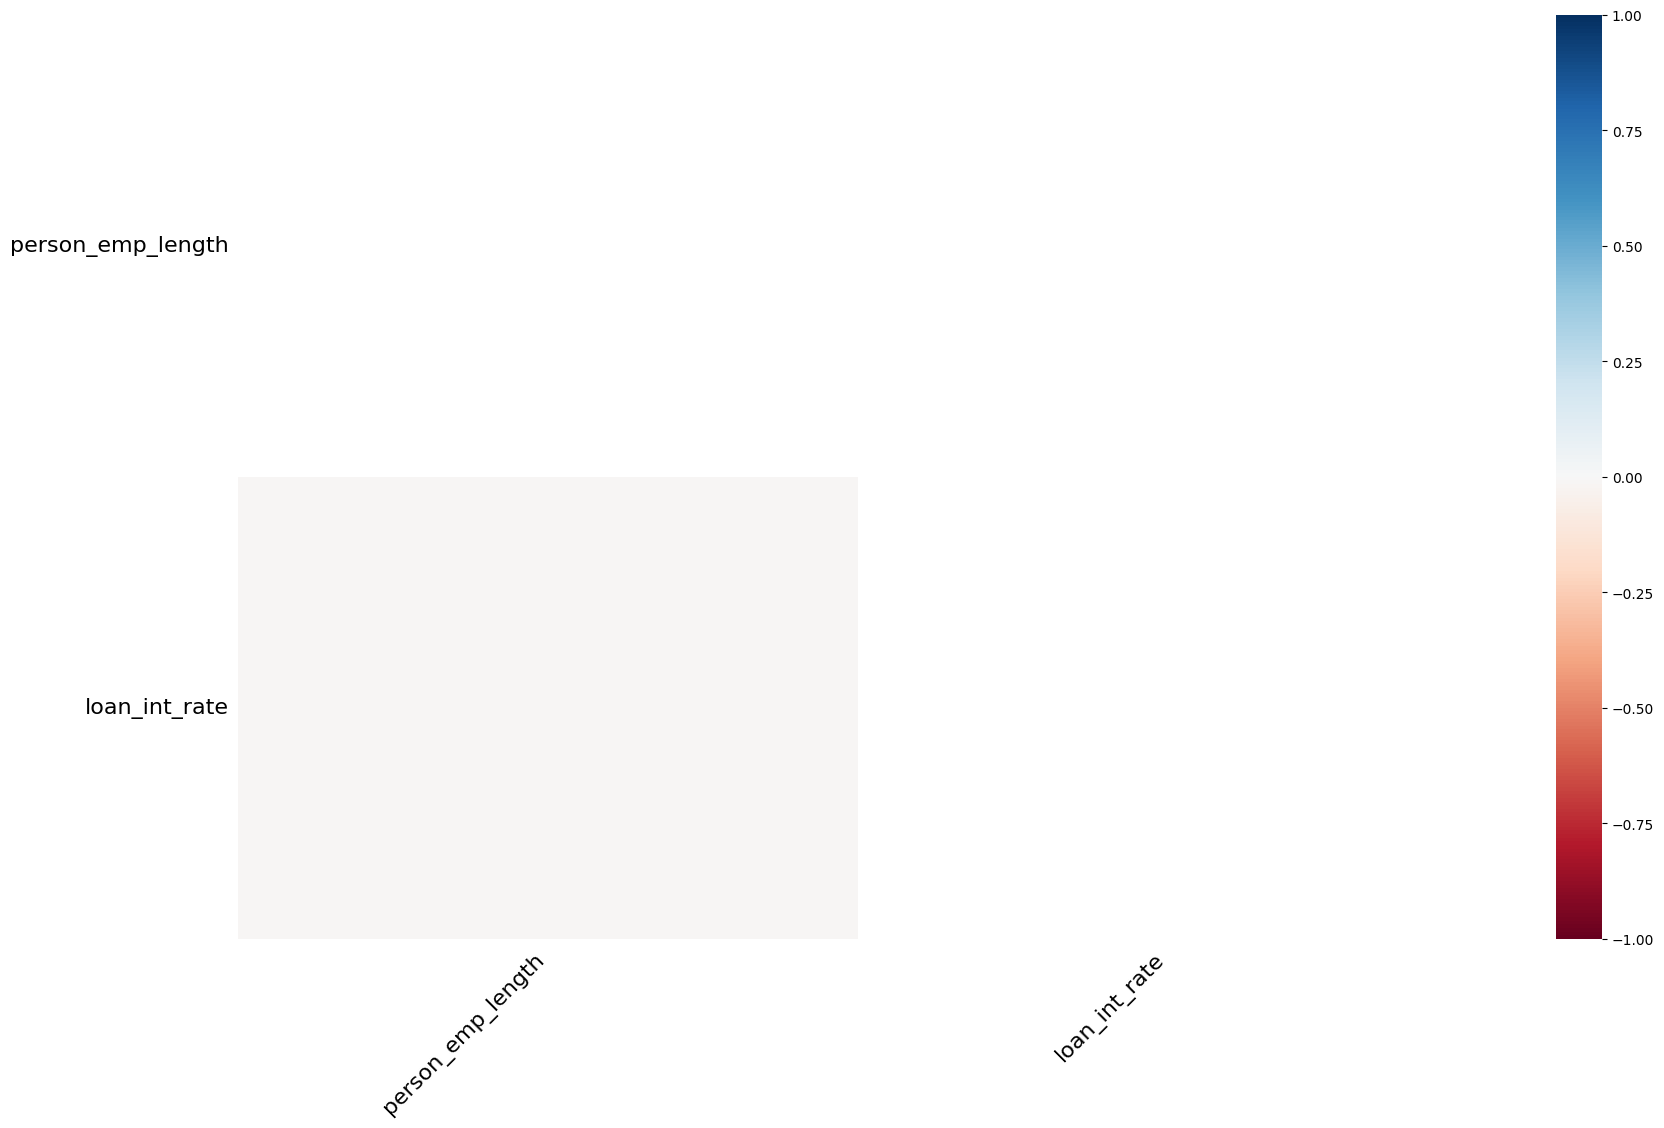

In [21]:
msno.heatmap(df2)

комментарий


In [22]:
cols = [x for x in df.columns if x.startswith('loint')]

meanPerson = {}

for col in cols:

    meanPerson[col] = np.sum(df['person_income'] * df[col]) / np.sum(df[col])

meanPerson

{'loint_DEBTCONSOLIDATION': 0.00638938246731601,
 'loint_EDUCATION': -0.03129366722857359,
 'loint_HOMEIMPROVEMENT': 0.12059310339623802,
 'loint_MEDICAL': -0.07482186374356566,
 'loint_PERSONAL': 0.028867864227830362,
 'loint_VENTURE': 0.005029286911738983,
 'loint_A': 0.007959688195953243,
 'loint_B': 0.004517278008549515,
 'loint_C': -0.018600708962436322,
 'loint_D': -0.03890096992651276,
 'loint_E': 0.07741352933561915,
 'loint_F': 0.17640366871594274,
 'loint_G': 0.17260526308958846,
 'loint_N': 0.0016718968809396378,
 'loint_Y': -0.007809751905464453}

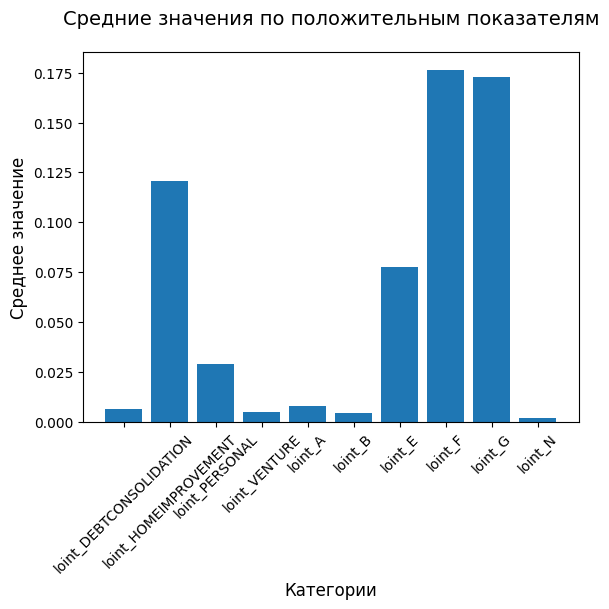

In [23]:
filtered_data = [(col, val) for col, val in zip(cols, list(meanPerson.values())) if val > 0]
filtered_cols, filtered_values = zip(*filtered_data) if filtered_data else ([], [])

plt.bar(filtered_cols, filtered_values)
plt.xticks(rotation=45)

plt.title('Средние значения по положительным показателям', pad=20, fontsize=14)
plt.xlabel('Категории', fontsize=12)
plt.ylabel('Среднее значение', fontsize=12)

plt.show()

комментарий

Комментарий: среднее значение по положительным показателям. График показывает средние значения для категорий с положительными показателями. Наибольшее значение наблюдаются у определённых категорий, что может указывать на них значимость в анализе кредитного риска

In [24]:
meanPerson = [np.nan] * 5  

for i in range(5):
    ind = (round(4 * df['person_home_ownership']) == i) 
    if np.sum(ind) > 0: 
        meanPerson[i] = np.sum(df['person_income'] * ind) / np.sum(ind)

meanPerson_filtered = [x for x in meanPerson if not np.isnan(x)]

meanPerson_final = meanPerson_filtered[:2] if len(meanPerson_filtered) >= 2 else meanPerson_filtered

print(meanPerson_final)

[-0.1787143121025072, -0.1329420388096581]


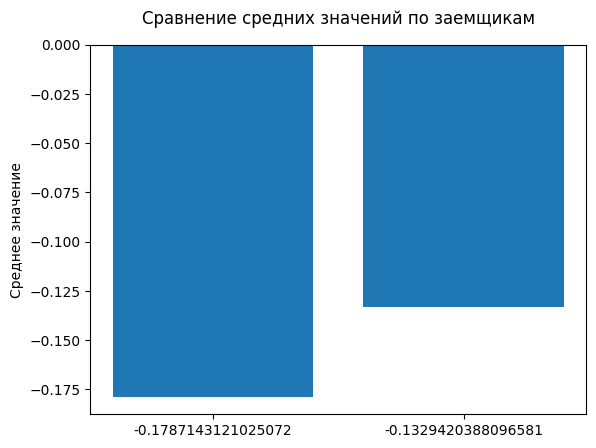

In [25]:
meanPerson_final = meanPerson_final + [0] * (2 - len(meanPerson_final))

plt.bar(range(2), meanPerson_final)
plt.title('Сравнение средних значений по заемщикам', pad=15)
plt.xticks(range(2), [str(x) for x in meanPerson_final])
plt.ylabel('Среднее значение')
plt.show()

Комментарий: Возможна ошибка в данных (отрицательные значения). График демонстрирует различия в средних значениях между двумя группами заемщиков. Отрицательные значения могут указывать на особенности данных или необходимость дополнительной нормализации.

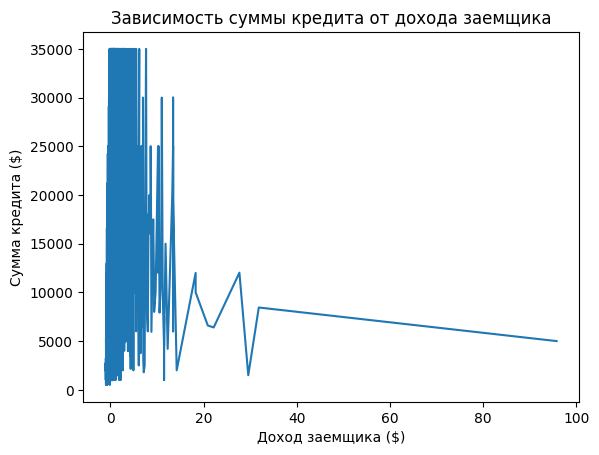

In [26]:
x = np.array(df['person_income'])  
y = np.array(df['loan_amnt'])     
ind = np.argsort(x)


plt.plot(x[ind],y[ind])
plt.xlabel('Доход заемщика ($)')
plt.ylabel('Сумма кредита ($)')
plt.title('Зависимость суммы кредита от дохода заемщика')

plt.show()

Комментарий: Зависимость суммы кредита от дохода заемщика. Наблюдается положительная коррелиция между доходом заемщика и суммоц кредита. Чем выше доход, тем больше сумма кредита.

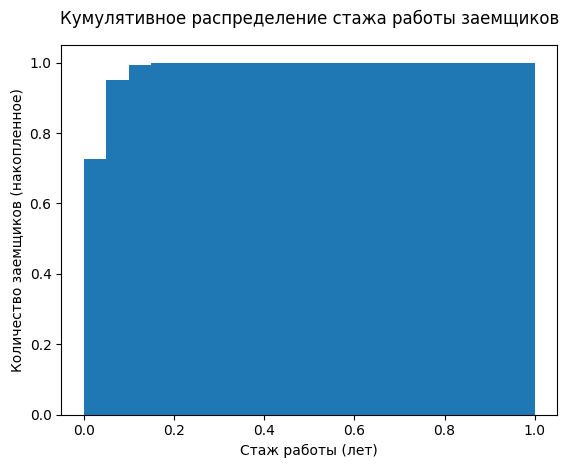

In [27]:
plt.hist(df['person_emp_length'], bins=20, density=True, cumulative=True)

plt.title('Кумулятивное распределение стажа работы заемщиков',pad=15)
plt.xlabel('Стаж работы (лет)')
plt.ylabel('Количество заемщиков (накопленное)')

plt.show()

Комментарий: Кумулятивное распределение стажа работы. График показывает, что большиноство заемщиков имеют небольшой стаж работы ( до 10 лет). Это может влиять на оценку кредитоспособности

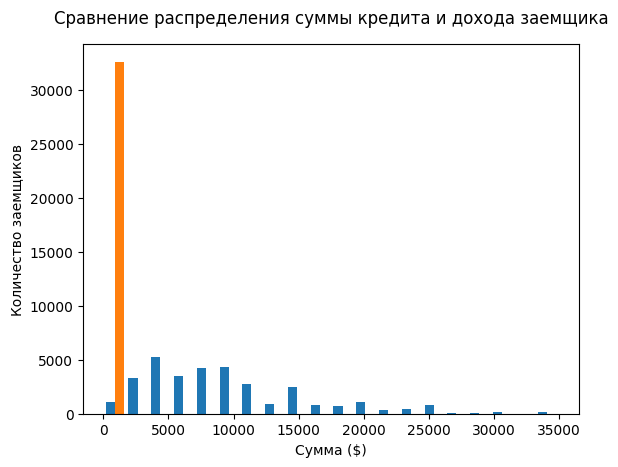

In [28]:
plt.hist([df['loan_amnt'], df['person_income']], bins=20)

plt.title('Сравнение распределения суммы кредита и дохода заемщика', pad=15)
plt.xlabel('Сумма ($)')
plt.ylabel('Количество заемщиков')

plt.show()

Комментарий: Сравнение распределения суммы редита и дохода. Гистограмма показывает, что суммы кредитов и доходы заемщиков имеют схожее распределение, но доходы в целом выше

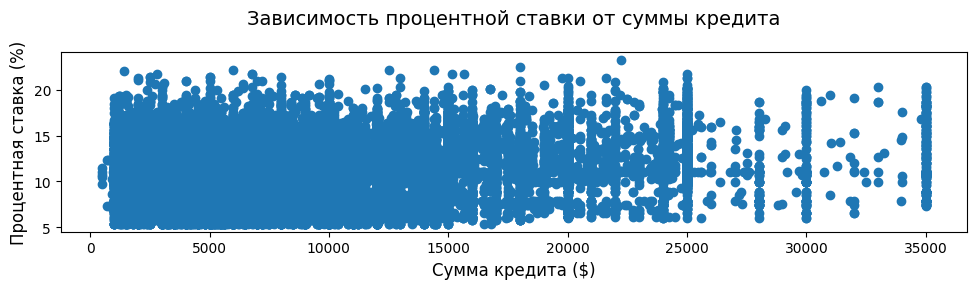

In [29]:
plt.figure(figsize=(10, 3))  

plt.scatter(df['loan_amnt'], df['loan_int_rate'])

plt.title('Зависимость процентной ставки от суммы кредита', pad=20, fontsize=14)
plt.xlabel('Сумма кредита ($)', fontsize=12)
plt.ylabel('Процентная ставка (%)', fontsize=12)

plt.tight_layout()  
plt.show()

Комментарий: Слабая тенденция снижения ставки для крупных кредитов. Наблюдается слабая зависимость: при увеличении суммы кредита процентная ставка может немного снижаться, что может быть связано с условием кредитирования для крупных займов

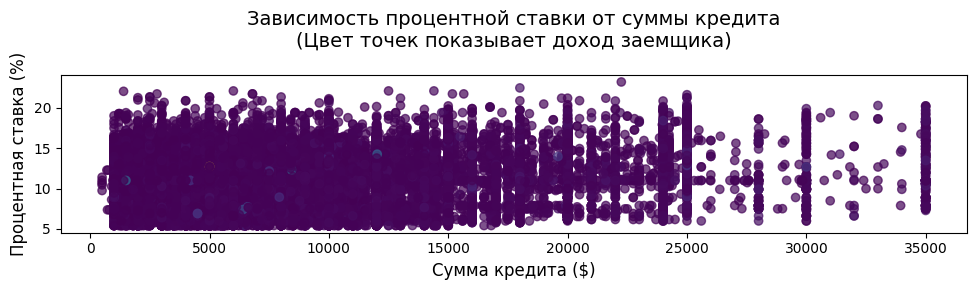

In [30]:
plt.figure(figsize=(10,3))

scatter = plt.scatter(df['loan_amnt'], df['loan_int_rate'], c=df['person_income'], alpha=0.7)

plt.title('Зависимость процентной ставки от суммы кредита\n(Цвет точек показывает доход заемщика)', 
          pad=20, fontsize=14)
plt.xlabel('Сумма кредита ($)', fontsize=12)
plt.ylabel('Процентная ставка (%)', fontsize=12)

plt.tight_layout()
plt.show()


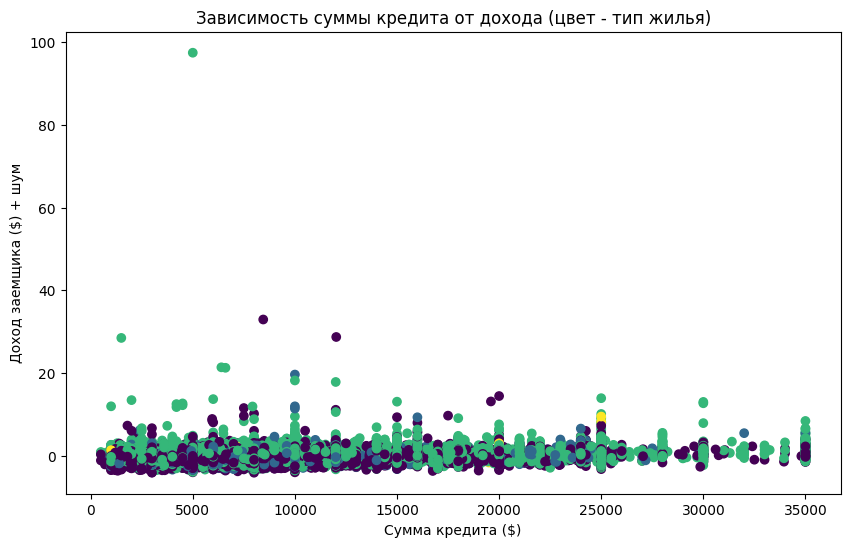

In [31]:
plt.figure(figsize=(10, 6))
x = df['person_income'] + np.random.normal(0, 1, len(df['person_income']))  
plt.scatter(df['loan_amnt'], x, c=df['person_home_ownership'])

plt.xlabel('Сумма кредита ($)')
plt.ylabel('Доход заемщика ($) + шум')
plt.title('Зависимость суммы кредита от дохода (цвет - тип жилья)')

plt.show()


Комментарий:Тип жилья влияет на соотношение дохода и кридиьа

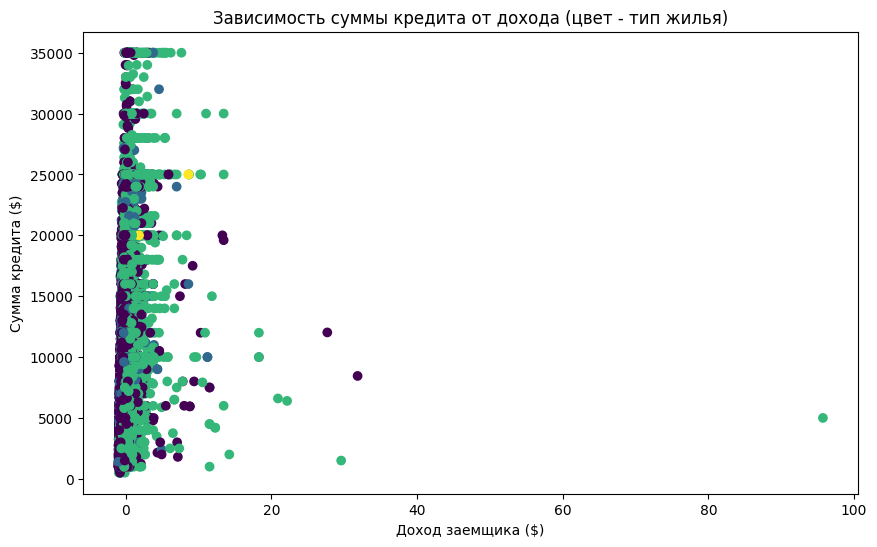

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(df['person_income'], df['loan_amnt'], c=df['person_home_ownership'])

plt.xlabel('Доход заемщика ($)')
plt.ylabel('Сумма кредита ($)')
plt.title('Зависимость суммы кредита от дохода (цвет - тип жилья)')

plt.show()

комментарий

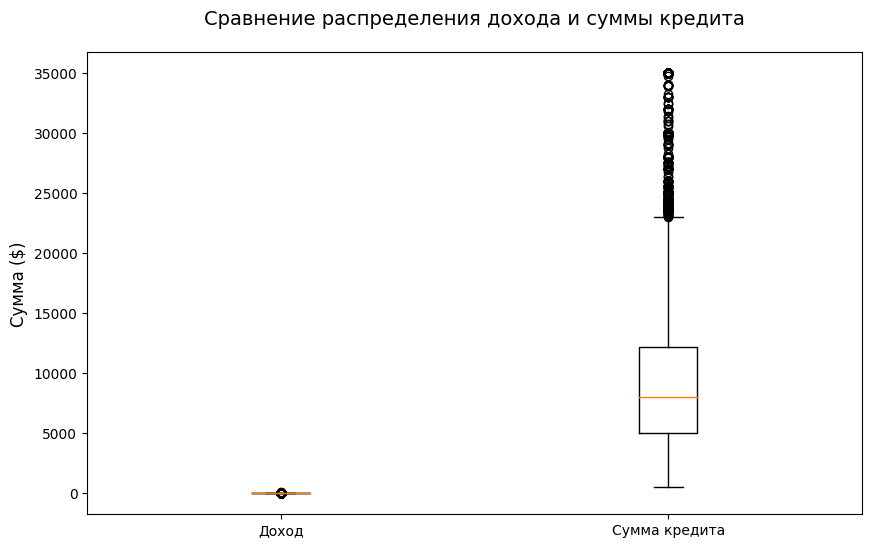

In [33]:

plt.figure(figsize=(10, 6))
plt.boxplot([df['person_income'], df['loan_amnt']])
plt.xticks([1, 2], ['Доход', 'Сумма кредита'])
plt.title('Сравнение распределения дохода и суммы кредита', pad=20, fontsize=14)
plt.ylabel('Сумма ($)', fontsize=12)
plt.show()


Комментарий: Доходы имеют больший разброс и выброс

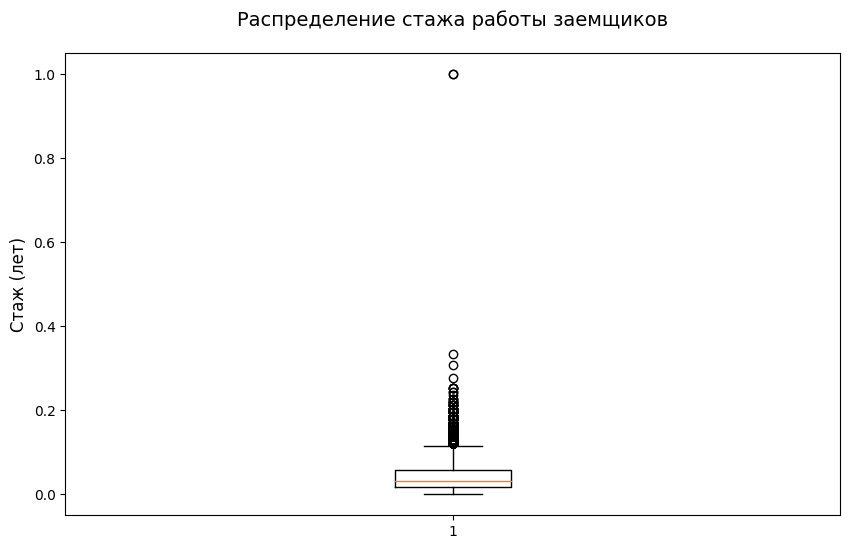

In [34]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['person_emp_length'])
plt.title('Распределение стажа работы заемщиков', pad=20, fontsize=14)
plt.ylabel('Стаж (лет)', fontsize=12)
plt.show()

Комментарий: Зависимость суммы кредита от дохода. Графики показывают, что тип жилья ( например, аренда, ипотка) может влиять на соотношения дохода и суммы кредита

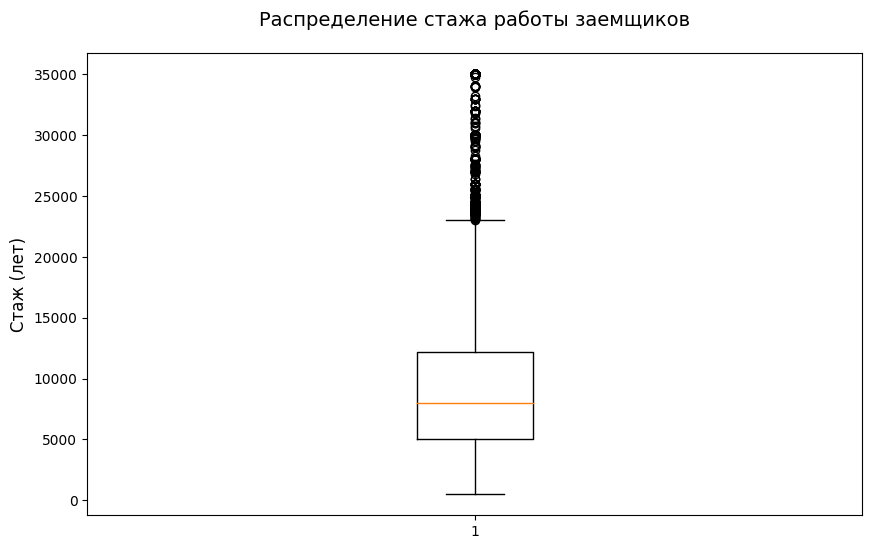

In [35]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['loan_amnt'])
plt.title('Распределение стажа работы заемщиков', pad=20, fontsize=14)
plt.ylabel('Стаж (лет)', fontsize=12)
plt.show()

Комментарий: Сравнение распределения дохода и суммы кредита. Bloxplot подтверждает, что доходы заемщиков в среднем выше, чем суммы кредитов

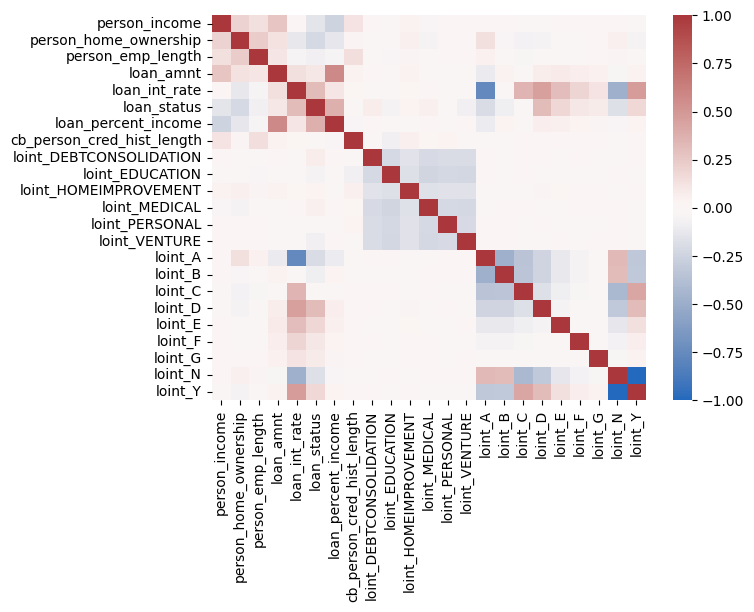

In [36]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(df.corr(), cmap='vlag')
plt.show()

Комментарий: Распределение стажа работы и суммы кредита. Графики показывают, что стаж работы заемщиков в основном небольшоц, а распределение сумм кредитов имеет широкий разброс

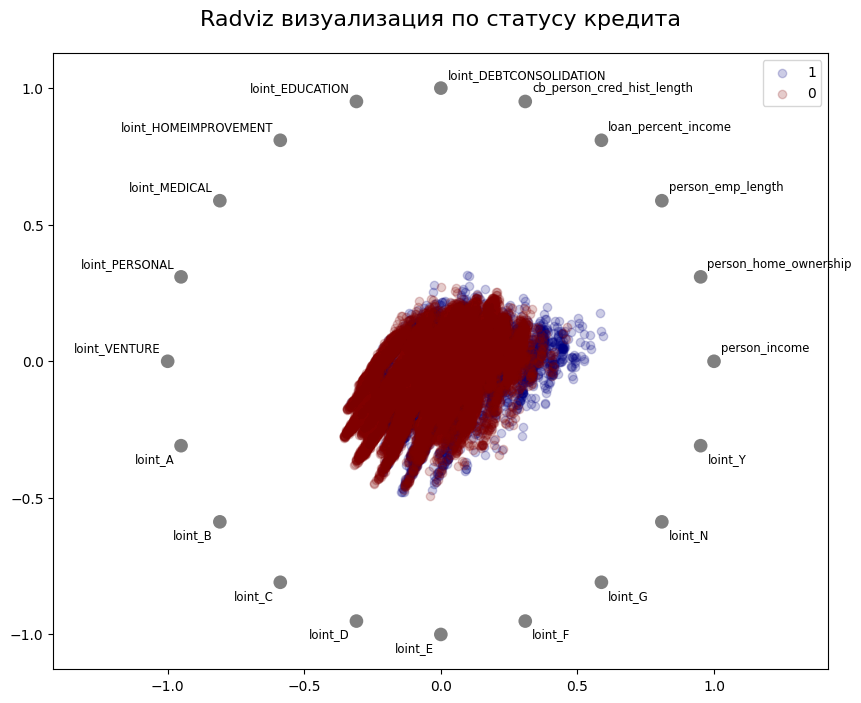

In [37]:
df3 = df.drop(columns=["loan_amnt", "loan_int_rate"])
plt.figure(figsize=(10, 8))
pd.plotting.radviz(df3, 'loan_status', colormap='jet', alpha=0.2)
plt.title('Radviz визуализация по статусу кредита', pad=20, fontsize=16)
plt.show()

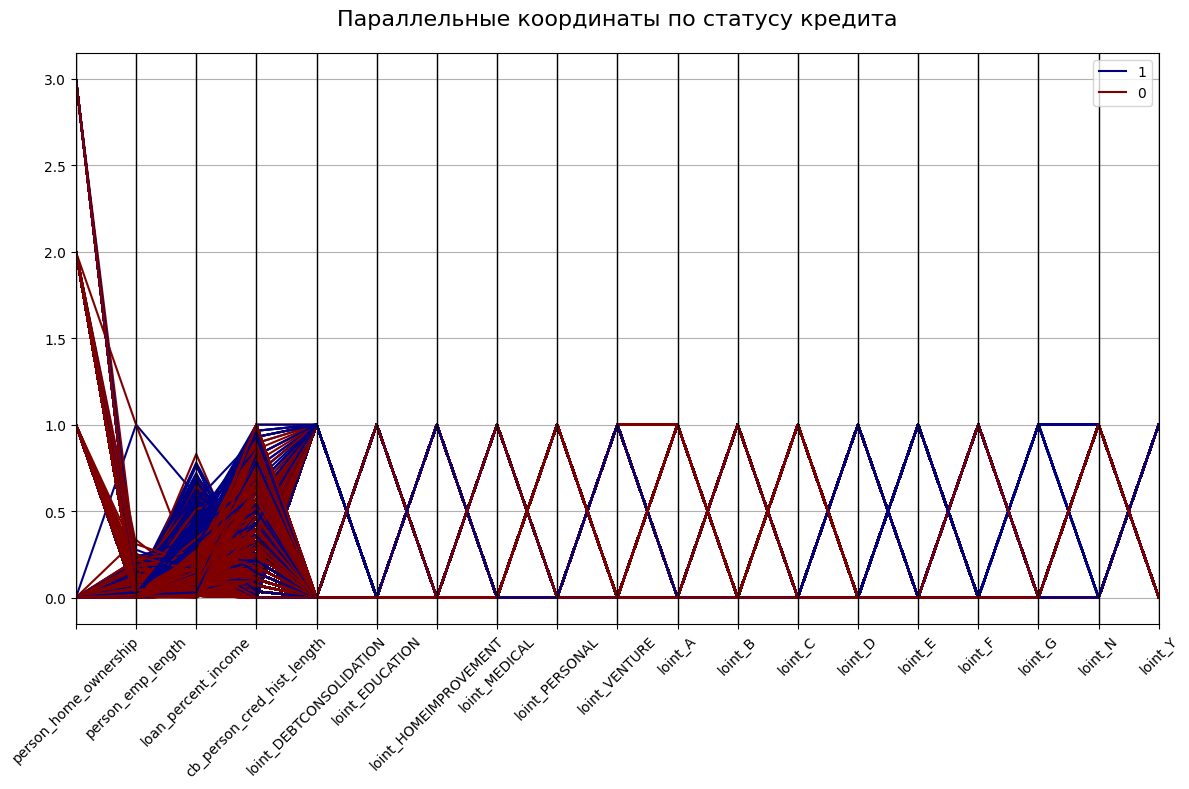

In [38]:
df3 = df.drop(columns=['person_income', "loan_amnt", "loan_int_rate"])
plt.figure(figsize=(12, 8))
pd.plotting.parallel_coordinates(df3, 'loan_status', colormap='jet')
plt.title('Параллельные координаты по статусу кредита', pad=20, fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Комментарий: Визуализация многомерных данных. Визуализация, демонстрирует, как различные признаки(например, доход, стаж работы) связаны со статусом кредита. Это помогает выявить ключевые факторы, влияющие на погашение кредита

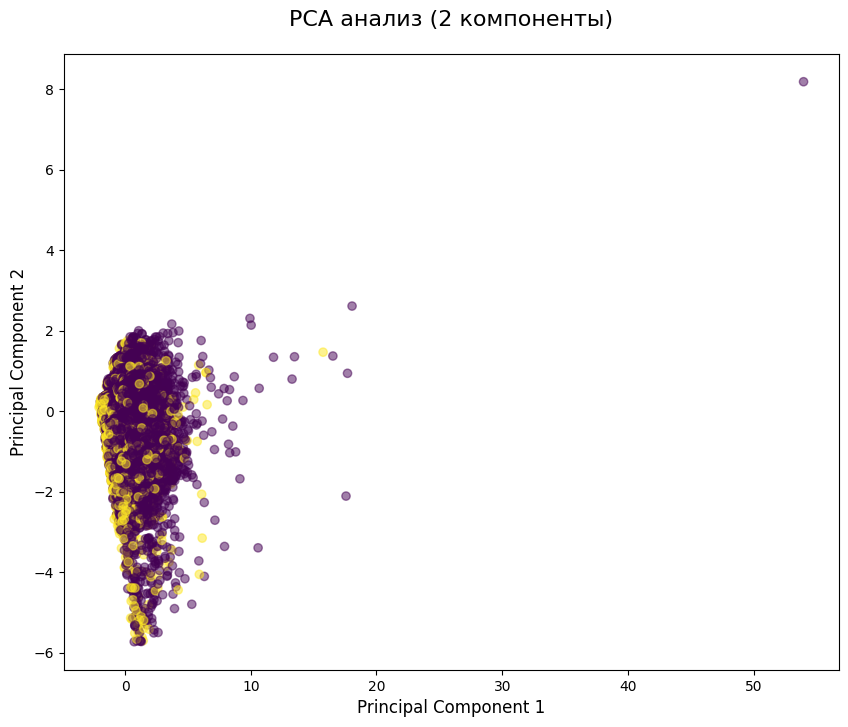

In [39]:
from sklearn.decomposition import PCA
X = df.drop(columns=["loan_amnt", "loan_int_rate", "loan_status"])
y = df[["loan_amnt", "loan_int_rate", "loan_status"]]

# Стандартизация данных
for col in ['person_income', 'person_emp_length', 'cb_person_cred_hist_length']:
    X[col] = (X[col] - np.mean(X[col])) / np.std(X[col])

pca = PCA(n_components=2)
X2 = pca.fit_transform(X)

plt.figure(figsize=(10, 8))
plt.scatter(X2[:, 0], X2[:, 1], c=y["loan_status"], alpha=0.5)
plt.title('PCA анализ (2 компоненты)', pad=20, fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)

plt.show()


Комментарий: Снижение размерности данных.

In [40]:
pca.components_

array([[ 5.28747582e-01,  4.92913913e-01,  5.72766296e-01,
        -1.86631333e-02,  3.80645435e-01, -9.94540623e-04,
        -2.02232218e-02,  2.11610320e-02, -1.27689398e-02,
         9.89238810e-03,  2.93328212e-03,  4.13369670e-02,
        -8.52100035e-03, -2.16787973e-02, -9.84556793e-03,
        -1.95192735e-03,  1.19626677e-04,  5.40699251e-04,
         1.84626408e-02, -1.84626408e-02],
       [ 1.22457194e-01,  4.73824201e-01,  4.83731155e-02,
        -8.09048930e-03, -8.66290501e-01,  3.19335173e-03,
         3.21657882e-02, -7.54183152e-03, -2.24824273e-02,
        -1.12558963e-02,  5.92101513e-03,  5.72118384e-02,
        -9.51127185e-03, -2.77521046e-02, -1.63880804e-02,
        -2.72607306e-03, -6.90928625e-04, -1.43379904e-04,
         2.69346590e-02, -2.69346590e-02]])

Ранг признаков: [1 1 1 1 1]
Выбранные признаки: [ True  True  True  True  True]


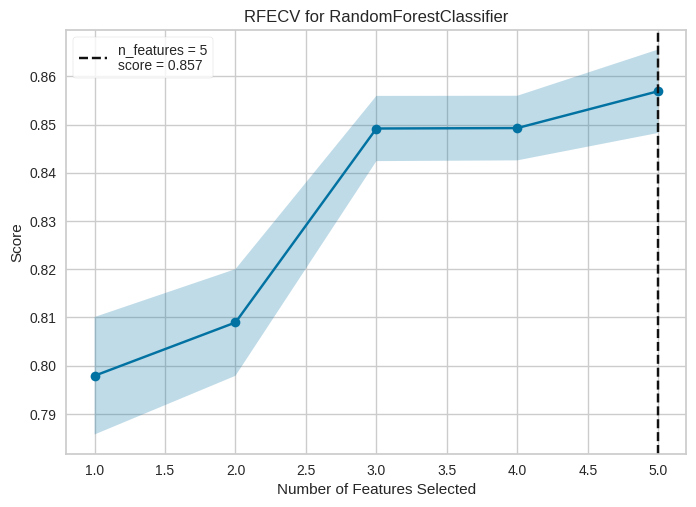

<Axes: title={'center': 'RFECV for RandomForestClassifier'}, xlabel='Number of Features Selected', ylabel='Score'>

In [41]:
from yellowbrick.features import RFECV
from sklearn import ensemble
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df["loan_status_encoded"] = label_encoder.fit_transform(df["loan_status"])

X = df[[
    "person_income", "person_emp_length",
    "loan_amnt", "loan_int_rate",
    "loan_percent_income"
]].dropna()

y = df.loc[X.index, "loan_status_encoded"]

from yellowbrick.features import RFECV
from sklearn import ensemble

estimator = ensemble.RandomForestClassifier(n_estimators=10)
selector = RFECV(estimator, cv=5)
selector = selector.fit(X, y)

print("Ранг признаков:", selector.ranking_)
print("Выбранные признаки:", selector.support_)
selector.show()

Комментарий: график RFECV наглядно показывает. Максимальный score (0.856) достигает при 5 признаках. Главный рост кривой подтверждает, что каждый добавленный признак улучшает качество


In [42]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

df['loan_high'] = (df['loan_amnt'] > df['loan_amnt'].median()).astype(int)

df_clean = df.dropna(subset=['loan_amnt'])

X = df_clean.drop(columns=[
    'loan_amnt',              
    'loan_high',              
])

y = df_clean['loan_high']

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

selector = RandomForestClassifier(n_estimators=10, random_state=42)
rfe = RFE(selector, n_features_to_select=5)
rfe.fit(X, y)

X.columns[rfe.support_]

Index(['person_income', 'person_emp_length', 'loan_int_rate',
       'loan_percent_income', 'cb_person_cred_hist_length'],
      dtype='object')

In [43]:
rfe.estimator_

RandomForestClassifier(n_estimators=10, random_state=42)

*часть 3. Интеллектуализация*

In [44]:
from sklearn.model_selection import train_test_split

# Подготовка данных для регрессии (прогнозирование суммы кредита) и классификации (статус кредита)
X = df.drop(columns=["loan_amnt", "loan_int_rate", "loan_status"])
y_reg = df['loan_amnt']
y_clf = df['loan_status']

# Разделение данных на обучающую и тестовую выборки
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X, y_reg, test_size=0.3, random_state=42)
X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(X, y_clf, test_size=0.3, random_state=42)

print(f"Размеры выборок:\nРегрессия - обучающая: {len(y_reg_train)}, тестовая: {len(y_reg_test)}\n"
f"Классификация - обучающая: {len(y_clf_train)}, тестовая: {len(y_clf_test)}")

Размеры выборок:
Регрессия - обучающая: 22806, тестовая: 9775
Классификация - обучающая: 22806, тестовая: 9775
